In [6]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [7]:
def diagrama_antena_satelite_ngso(alfa):
    """
    Apêndice 30B do Regulamento de Radiocomunicações.

    Parâmetros:
    alfa (float ou np.ndarray): Ângulo em graus.

    Retorna:
    float ou np.ndarray: Ganho da antena em dBi.
    """

    Gmax = 13  # dBi
    alfa_0 = 52  # graus

    alfa = np.asarray(alfa) 

    G = np.empty_like(alfa, dtype=float)

    condition1 = (alfa/alfa_0 >= 0) & (alfa/alfa_0 <= 1.45)
    condition2 = (alfa/alfa_0 > 1.45)

    G[condition1] = Gmax - 12 * (alfa[condition1]/alfa_0)**2 
    G[condition2] = Gmax - 22 - 20*np.log10(alfa[condition2]/alfa_0)

    G[~(condition1 | condition2)] = np.nan

    if G.size == 1:
        return G.item()
    return G

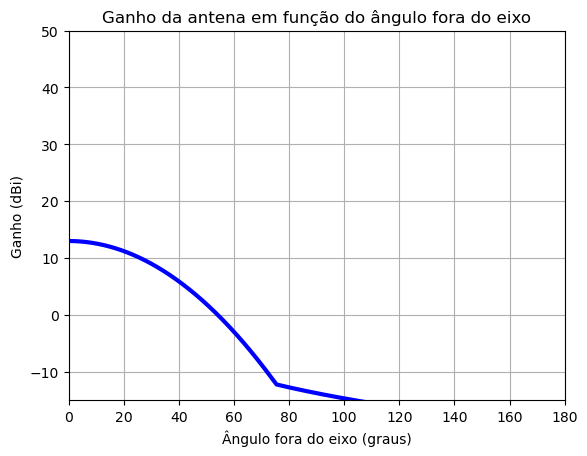

In [8]:
alfa = np.linspace(0, 180, 10000)  # Ângulos de 0 a 180 graus
ganho = diagrama_antena_satelite_ngso(alfa)
plt.plot(alfa, ganho, linewidth=3, color='b')
plt.xlabel('Ângulo fora do eixo (graus)')
plt.ylabel('Ganho (dBi)')
plt.title('Ganho da antena em função do ângulo fora do eixo')
plt.xlim(0, 180)
plt.ylim(-15, 50)
plt.grid(True)
plt.show()

In [9]:
# Example usage:
beta_angles = np.array([0.5, 1.0, 10.0, 50.0, 200.0])
gains = diagrama_antena_satelite_ngso(beta_angles)
print(gains)

print(diagrama_antena_satelite_ngso(30))

[ 12.99889053  12.99556213  12.55621302   1.90532544 -20.70053304]
9.005917159763314


In [ ]:
# def diagrama_antena_satelite_itu_s672(alfa):